## **Kaggle Competition Submission**



```
Submission by: Smrithi Agrawal
UID: 2019140001
Course: Data Analytics
```



---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# reading train data
train=pd.read_csv('train.csv')

# reading test data
test=pd.read_csv('test.csv')

## Cleaning "train.csv"

---



In [ ]:
# studying the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looking at the data we can understand that PassengerId, Name, Ticket and Cabin are not so relevant columns as they provide data that are comparatively less associated with the prediction required to be carried out. Hence, moving further, I will drop these columns from the dataset.

In [ ]:
# number of rows and columns
train.shape

(891, 12)

The dataset "train.csv" has 891 rows and 12 distinct columns.

In [ ]:
# to fetch the column header names of the train dataset
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# number of null values in dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It is observed that 'Age' and 'Cabin' has an alarming number of null value fields.

## Analysing each column of the dataset 

---



# 1. Sex

In [ ]:
# classifying passengers based on their sex
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

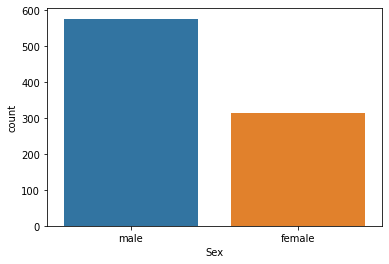

In [ ]:
# visualising the above data
sns.countplot(x='Sex', data=train)

It is observed that there were almost double the count of female passengers than male passengers onboard.

# 2. Pclass

In [ ]:
# classifying passengers based on their class
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

There is a pattern observed in the sum of passengers onbaord when grouped by their class:


*   Lowest class (ie. 3) has the maximum passengers
*   Highest class (ie.1) has the least count of passengers on-board


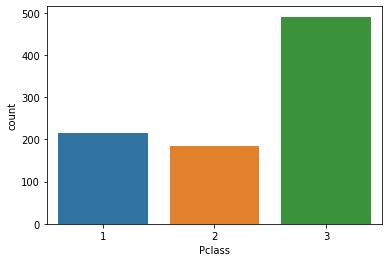

In [ ]:
# visualising the above data
sns.countplot(x='Pclass', data=train)

# 3. SibSp

In [ ]:
# classifying passengers based on their class
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

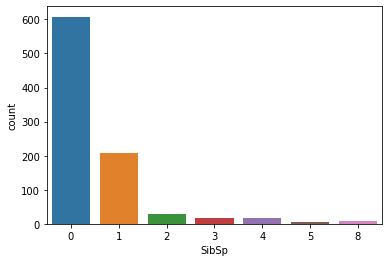

In [ ]:
# visualising the above data
sns.countplot(x='SibSp', data=train)

# 4. Parch

In [ ]:
# classifying passengers based on their class
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

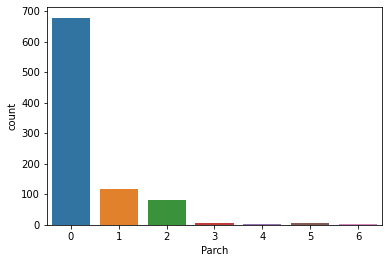

In [ ]:
# visualising the above data
sns.countplot(x='Parch', data=train)

# 5. Embarked

In [ ]:
# classifying passengers based on their class
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

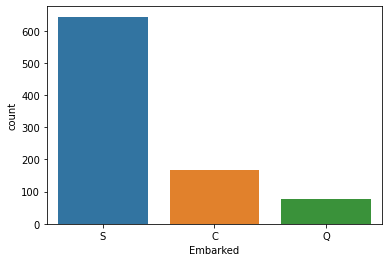

In [ ]:
# visualising the above data
sns.countplot(x='Embarked', data=train)

## Analysing survival based on ticket fare

---



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


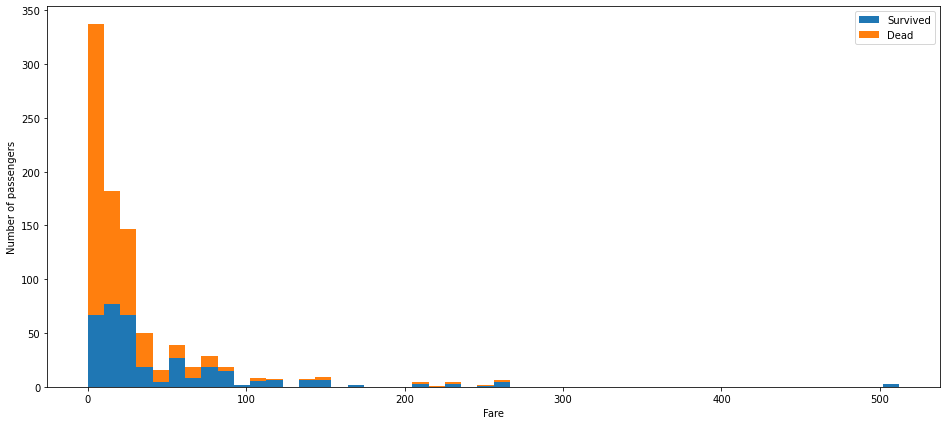

In [ ]:
figure = plt.figure(figsize=(16, 7))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']], 
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

To the left on the graph, the total number of deaths is high. It can be directly related to the fare. 

## Analysing survival based on gender

---




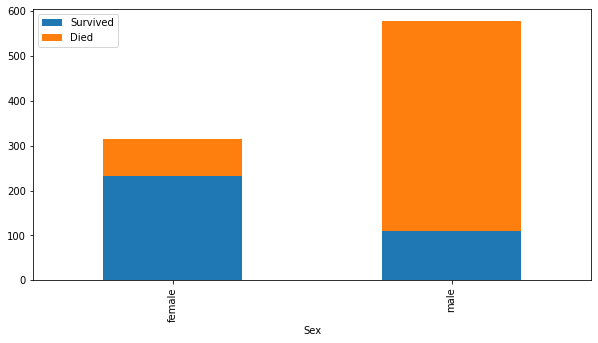

In [ ]:
train['Died'] = 1 - train['Survived']
train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 5), stacked=True)

## Feature engineering

In [ ]:
titles = set()
for name in train['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Mlle', 'Col', 'Mr', 'Dr', 'Sir', 'Major', 'Lady', 'Don', 'Ms', 'Mme', 'the Countess', 'Mrs', 'Jonkheer', 'Miss', 'Master', 'Capt', 'Rev'}


In [ ]:
Title_Dictionary = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty","Don": "Royalty","Sir" : "Royalty","Dr": "Officer","Rev": "Officer","the Countess":"Royalty","Mme": "Mrs","Mlle": "Miss","Ms": "Mrs","Mr" : "Mr","Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

In [ ]:
train['Title'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
train['Title'] = train.Title.map(Title_Dictionary)
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,Mrs


## Cleaning "train.csv"

In [ ]:
# dropping umwanted columns
df1=train.drop(['Name','Ticket','Cabin','PassengerId','Died'], axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [ ]:
train.Title.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [ ]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [ ]:
# median age of each sex
median_age_men=df1[df1['Sex']==1]['Age'].median()
median_age_women=df1[df1['Sex']==0]['Age'].median()

# filling null values in 'Age' with respective median age
df1.loc[(df1.Age.isnull()) & (df1['Sex']==0),'Age']=median_age_women
df1.loc[(df1.Age.isnull()) & (df1['Sex']==1),'Age']=median_age_men

In [ ]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [ ]:
# drop the rows with 2 null values in the "Embarked" column
df1.dropna(inplace=True)

In [ ]:
# check again for null values in the dataset
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [ ]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,1,2
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,2
4,0,3,1,35.0,0,0,8.0500,0,0


# Finally, we have achieved zero null values in our dataset.

In [ ]:
# Converting categorical feature to numeric
df1.Sex=df1.Sex.map({'female':0, 'male':1})
df1.Embarked=df1.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
df1.Title=df1.Title.map({'Mr':0, 'Miss':1, 'Mrs':2,'Master':3,'Officer':4,'Royalty':5})
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,1,2
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,2
4,0,3,1,35.0,0,0,8.0500,0,0


## Feautre Scaling

In [ ]:
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.395017,0.524184,0.382452,32.096681,0.733408
std,0.486260,0.834700,0.477538,12.984264,1.103705,0.806761,49.697504,1.051499
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,5.000000


In [ ]:
df1.Age = (df1.Age-min(df1.Age))/(max(df1.Age)-min(df1.Age))
df1.Fare = (df1.Fare-min(df1.Fare))/(max(df1.Fare)-min(df1.Fare))

In [ ]:
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.364099,0.524184,0.382452,0.062649,0.733408
std,0.486260,0.834700,0.477538,0.163160,1.103705,0.806761,0.097003,1.051499
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015412,0.000000
50%,0.000000,3.000000,1.000000,0.359135,0.000000,0.000000,0.028213,0.000000
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508,1.000000
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000,5.000000


## Data Modelling

In [ ]:
from sklearn.model_selection import train_test_split

# for logistic regression
from sklearn.linear_model import LogisticRegression

# for accuracy_score
from sklearn.metrics import accuracy_score

# for confusion matrix
from sklearn.metrics import confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( df1.drop(['Survived'], axis=1), df1.Survived, test_size= 0.2, random_state=0, stratify=df1.Survived)

In [ ]:
# Logistic regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

Y_pred = clf.predict(X_test)
accuracy_score(y_test, Y_pred)

0.8426966292134831

In [ ]:
# confusion matrix

conf_matrix = confusion_matrix(y_test, Y_pred)
conf_matrix

array([[98, 12],
       [16, 52]])

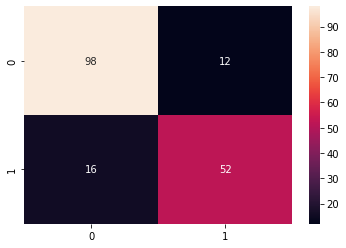

In [ ]:
sns.heatmap(conf_matrix,annot=True)

## Cleaning "test.csv"
(Similar to cleaning train.csv)

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titles = set()
for name in test['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Col', 'Mr', 'Dr', 'Dona', 'Ms', 'Mrs', 'Miss', 'Master', 'Rev'}


In [ ]:
test['Title'] = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test['Title'] = test.Title.map(Title_Dictionary)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [ ]:
df2=test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [ ]:
df2.Sex=df2.Sex.map({'female':0, 'male':1})
df2.Embarked=df2.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'nan'})
df2.Title=df2.Title.map({'Mr':0, 'Miss':1, 'Mrs':2,'Master':3,'Officer':4,'Royalty':5})
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,2,0.0
1,3,0,47.0,1,0,7.0000,0,2.0
2,2,1,62.0,0,0,9.6875,2,0.0
3,3,1,27.0,0,0,8.6625,0,0.0
4,3,0,22.0,1,1,12.2875,0,2.0


In [ ]:
df2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        1
dtype: int64

In [ ]:
median_age_men2=df2[df2['Sex']==1]['Age'].median()
median_age_women2=df2[df2['Sex']==0]['Age'].median()

In [ ]:
df2.loc[(df2.Age.isnull()) & (df2['Sex']==0),'Age']=median_age_women2
df2.loc[(df2.Age.isnull()) & (df2['Sex']==1),'Age']=median_age_men2

In [ ]:
df2['Fare']=df2['Fare'].fillna(df2['Fare'].median())

In [ ]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       1
dtype: int64

In [ ]:
# for the null value in the title column
df2[df2.Title.isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
414,1,0,39.0,0,0,108.9,1,NaN


In [ ]:
df2=df2.fillna(2)

In [ ]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [ ]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,2,0.0
1,3,0,47.0,1,0,7.0000,0,2.0
2,2,1,62.0,0,0,9.6875,2,0.0
3,3,1,27.0,0,0,8.6625,0,0.0
4,3,0,22.0,1,1,12.2875,0,2.0


## Finally, dataset "test.csv" is free from null values

In [ ]:
df2.Age = (df2.Age-min(df2.Age))/(max(df2.Age)-min(df2.Age))
df2.Fare = (df2.Fare-min(df2.Fare))/(max(df2.Fare)-min(df2.Fare))

In [ ]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,0.452723,0,0,0.015282,2,0.0
1,3,0,0.617566,1,0,0.013663,0,2.0
2,2,1,0.815377,0,0,0.018909,2,0.0
3,3,1,0.353818,0,0,0.016908,0,0.0
4,3,0,0.287881,1,1,0.023984,0,2.0


## Prediction

In [ ]:
prediction = clf.predict(df2)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": prediction})
submission.to_csv('submission.csv', index=False)

In [ ]:
pred_df = pd.read_csv('submission.csv')

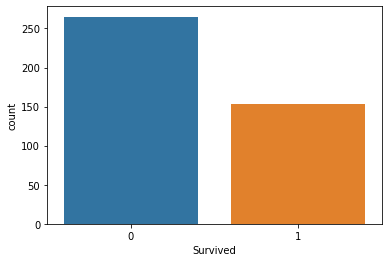

In [ ]:
# visualizing sub,ission values
sns.countplot(x='Survived', data=pred_df)

### Thank You